## Hydro Inflow - Affluent Natural Energy

**Affluent Natural Energy (NAE, or ENA in Portuguese),** measured in MWaverage (abbr. MWavg), is a direct conversion of precipitation into energy. For instance, a natural inflow of 10,000 MWavg in the Southeast/Central-West subsystem at any day means that such subsystem is capable to generate (10,000) x (number of days) x (number of hours in one day) = (10,000 MWavg) x (1 day) x (24 hours) = 240,000 MWh. 

Another example, 10,000 MWavg over a month with 30 days represents 7,200,000 MWh (10,000 MWavg x 30 days x 24 hours). What does it mean? It means that in the Brazilian power market we do not often talk about MWh, we instead use MWavg because it eliminates the “time dependency” of the energy variables.

There’s a distinction between market and settlement prices. Predicting settlement prices may be out of the scope of your work. It made sense for me that you are more interested in prediction market movements given hydrological variables.

Despite Brazil having four grids (subsystems), market products are more liquid (almost entirely) considering the **Southeast/Central-West **subsystem. I suggest you consider the effects of other submarkets while working with inflows, but consider the Southeast/Central-West only when working with market prices.
 

--The script Actual_Natural-Inflows.sql might help you. It outputs actual NAE by grid over Brazil.

Columns

-  **DataSource:** Source of data. In this case, the Brazilian National System Operator (ONS).
-  **DateTime:** The reference date.
- **PowerPriceAreaCode:** The subsystem (four).
-  **Location:** Analogous to PowerPriceAreaCode.
-  **Inflow:** NAE (in MWavg).

In [1]:
import pandas as pd 
import os
from get_cleaned_data import get_hydro_inflow_cleaned

df_hydro = get_hydro_inflow_cleaned()

display(df_hydro.head())

,DateTime,Inflow,Region
0,2024-10-06,8198.2982,SE/CW
1,2024-10-06,8564.7942,S
2,2024-10-06,1015.1727,NE
3,2024-10-06,923.9403,N
4,2024-10-05,8330.1936,SE/CW


In [2]:
df_hydro.groupby('Region').describe()

Inflow                                                       \
         count          mean           std        min           25%   
Region                                                                
N       2148.0  11320.421187  10299.736033   923.9403   2390.618475   
NE      2148.0   5048.118069   4690.755766   845.4619   1889.236475   
S       2148.0   9623.784662  10080.817454   721.8413   3934.820450   
SE/CW   2148.0  33609.719056  18980.738352  8198.2982  18338.394950   

                                                
                50%           75%          max  
Region                                          
N        6781.24725  19753.053400   39423.3641  
NE       3005.50090   6564.564150   26612.4218  
S        6591.54210  11150.385550  100836.5678  
SE/CW   27578.32555  45139.548125   98472.7086

In [3]:
#check for nulls
null_count = df_hydro['Inflow'].isnull().sum()
display(null_count)

0

## Data Visualization

C:\Users\veron\AppData\Local\Temp\ipykernel_40476\3136823148.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_hydro, x='DateTime', y='Inflow', hue='Region', ci=None)


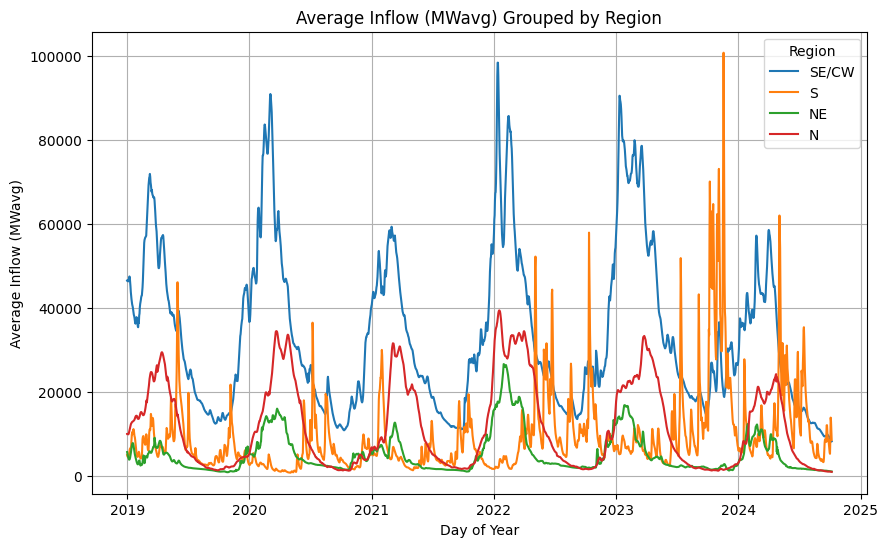

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

    
    # Create a plot for this year showing different regions on the same graph
plt.figure(figsize=(10, 6))
    
    # Use seaborn's lineplot with 'hue' to differentiate regions
sns.lineplot(data=df_hydro, x='DateTime', y='Inflow', hue='Region', ci=None)
    
    # Customize the plot
plt.title(f'Average Inflow (MWavg) Grouped by Region')
plt.xlabel('Day of Year')
plt.ylabel('Average Inflow (MWavg)')
plt.grid(True)
    
    # Show the plot
plt.legend(title='Region')
plt.show()

In [5]:
df_hydro['DateTime'] = pd.to_datetime(df_hydro['DateTime'])
df_hydro['Year'] = df_hydro['DateTime'].dt.year
df_hydro['Month'] = df_hydro['DateTime'].dt.month
df_grouped = df_hydro.groupby([df_hydro['Year'], df_hydro['Month']])['Inflow'].agg('sum').reset_index()
df_grouped.columns = ['Year', 'Month', 'Sum Inflow']


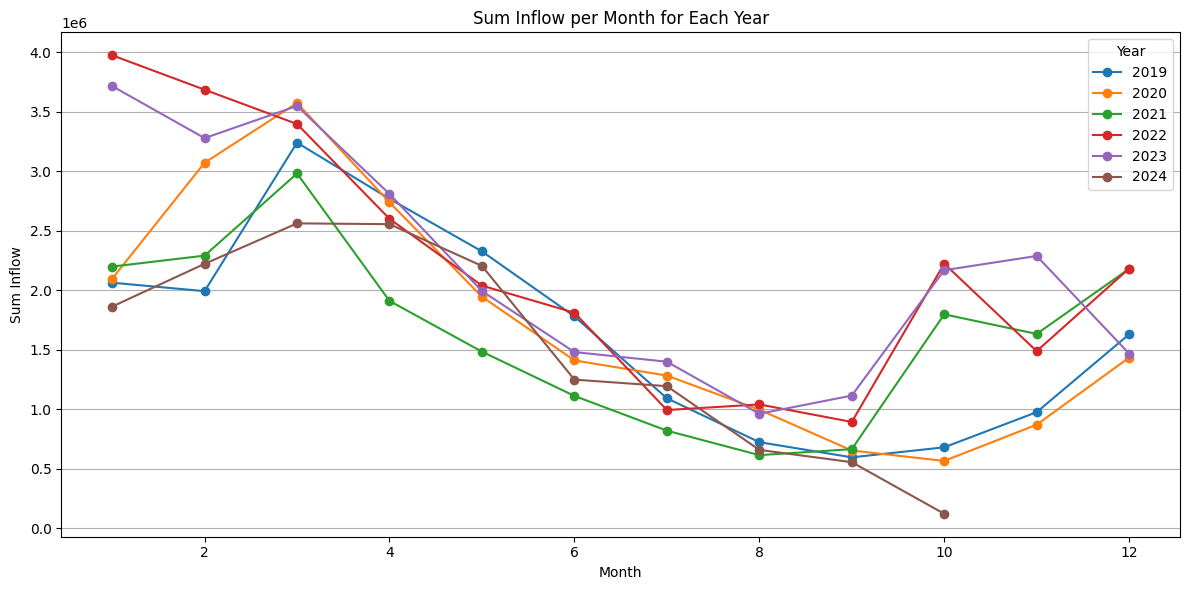

In [6]:
# Pivot the DataFrame for visualization
df_pivot = df_grouped.pivot(index='Month', columns='Year', values='Sum Inflow')
# Visualization
plt.figure(figsize=(12, 6))
# You can use line plot
df_pivot.plot(marker='o', linestyle='-', ax=plt.gca())

# Adding labels and title
plt.title('Sum Inflow per Month for Each Year')
plt.xlabel('Month')
plt.ylabel('Sum Inflow')
plt.xticks(rotation=0)  # Rotate month labels for better visibility
plt.legend(title='Year')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\veron\AppData\Local\Temp\ipykernel_40476\1747222996.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_year, x='DateTime', y='Inflow', hue='Region', ci=None)


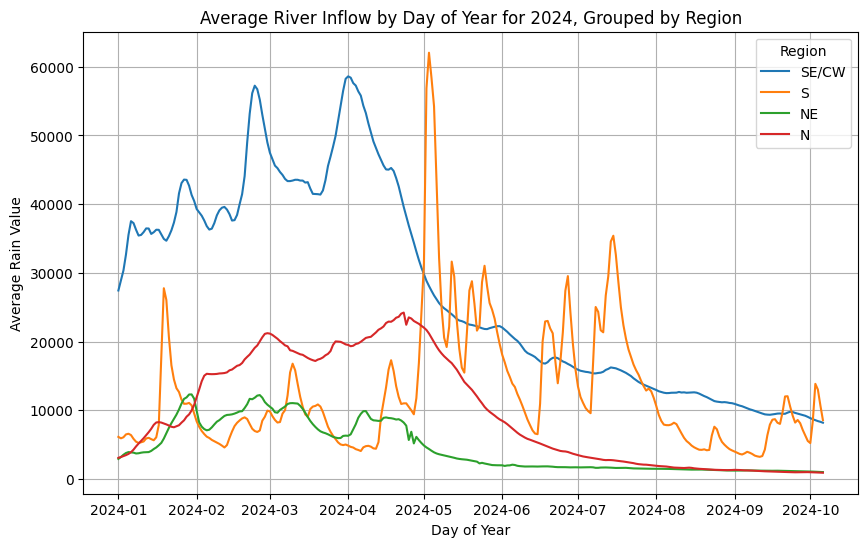

C:\Users\veron\AppData\Local\Temp\ipykernel_40476\1747222996.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_year, x='DateTime', y='Inflow', hue='Region', ci=None)


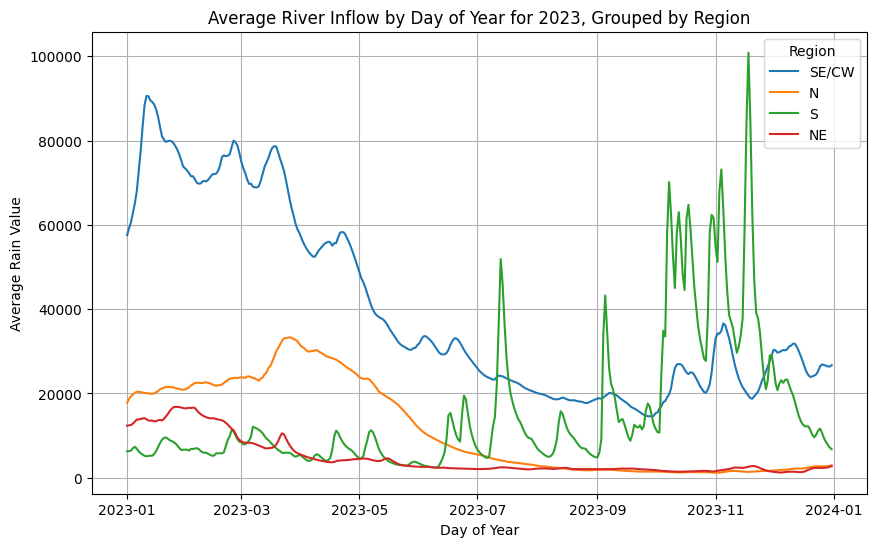

C:\Users\veron\AppData\Local\Temp\ipykernel_40476\1747222996.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_year, x='DateTime', y='Inflow', hue='Region', ci=None)


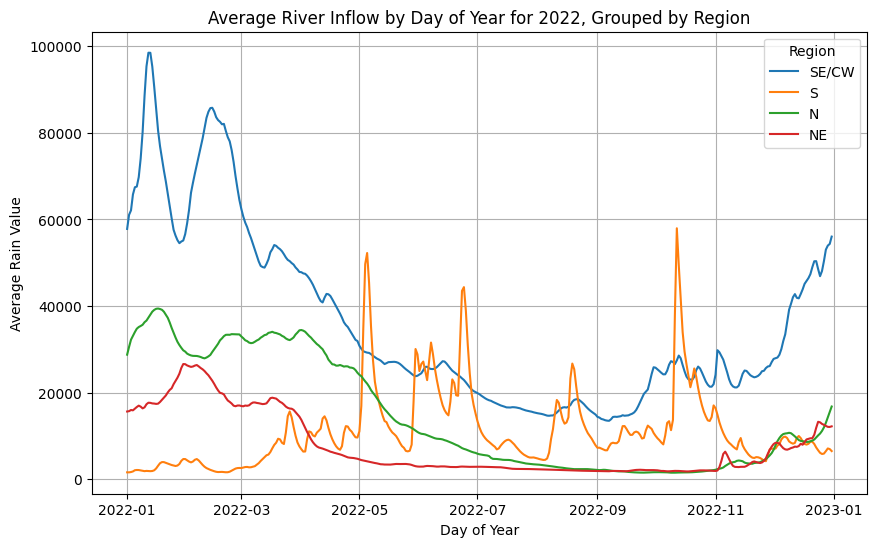

C:\Users\veron\AppData\Local\Temp\ipykernel_40476\1747222996.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_year, x='DateTime', y='Inflow', hue='Region', ci=None)


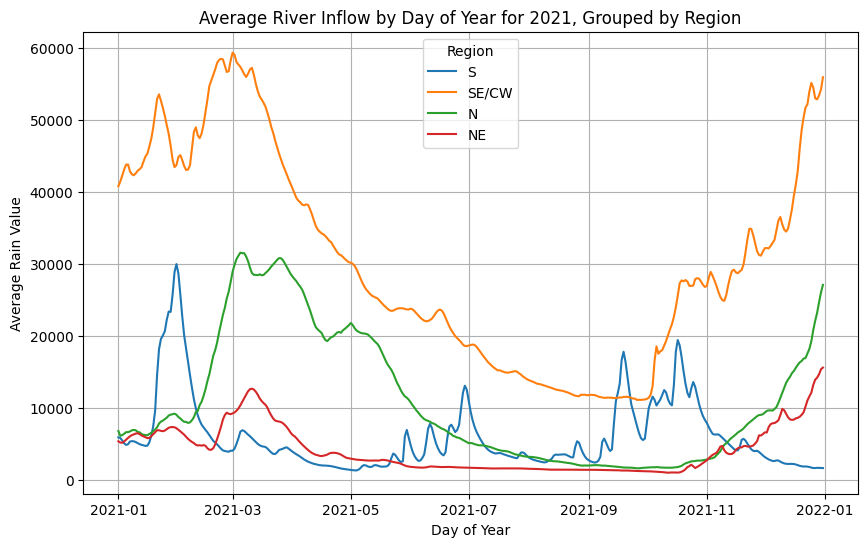

C:\Users\veron\AppData\Local\Temp\ipykernel_40476\1747222996.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_year, x='DateTime', y='Inflow', hue='Region', ci=None)


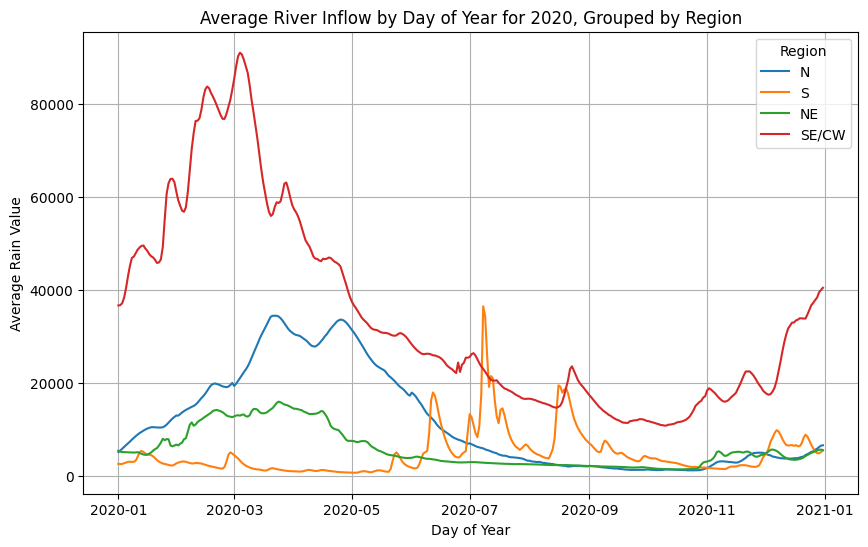

C:\Users\veron\AppData\Local\Temp\ipykernel_40476\1747222996.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_year, x='DateTime', y='Inflow', hue='Region', ci=None)


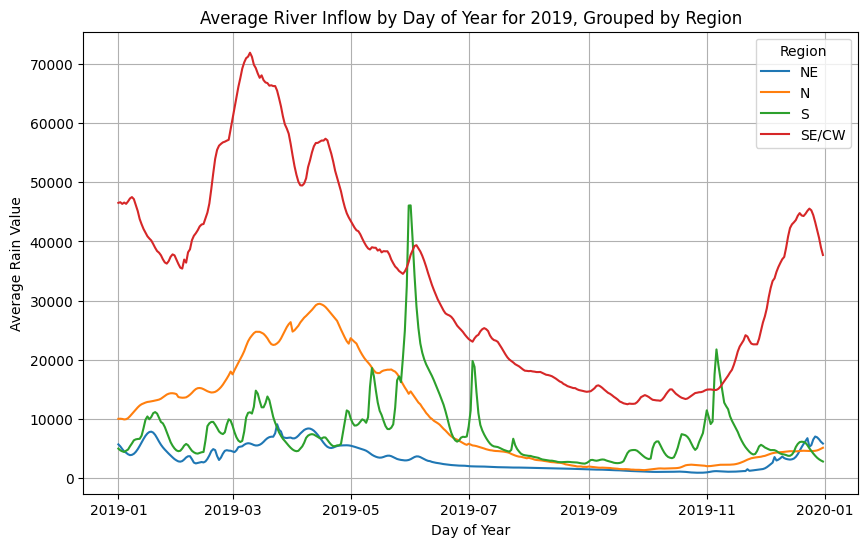

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop over the unique years and plot the average rain values for each year with region distinction
unique_years = df_hydro['DateTime'].dt.year.unique()

for year in unique_years:
    # Filter the dataframe for the specific year
    df_year = df_hydro[df_hydro['DateTime'].dt.year == year]
    
    # Create a plot for this year showing different regions on the same graph
    plt.figure(figsize=(10, 6))
    
    # Use seaborn's lineplot with 'hue' to differentiate regions
    sns.lineplot(data=df_year, x='DateTime', y='Inflow', hue='Region', ci=None)
    
    # Customize the plot
    plt.title(f'Average River Inflow by Day of Year for {year}, Grouped by Region')
    plt.xlabel('Day of Year')
    plt.ylabel('Average Rain Value')
    plt.grid(True)
    
    # Show the plot
    plt.legend(title='Region')
    plt.show()


In [8]:
df_pivot.head()

Year,2019,2020,2021,2022,2023,2024
Month,,,,,,
1,2.064720e+06,2.097642e+06,2.200185e+06,3.975578e+06,3.716684e+06,1.864057e+06
2,1.993685e+06,3.072234e+06,2.292067e+06,3.686234e+06,3.279477e+06,2.223207e+06
3,3.241354e+06,3.574632e+06,2.982268e+06,3.397921e+06,3.549508e+06,2.563094e+06
4,2.769743e+06,2.740017e+06,1.911465e+06,2.601363e+06,2.809878e+06,2.556556e+06
5,2.327631e+06,1.946542e+06,1.485276e+06,2.040247e+06,1.994532e+06,2.205815e+06


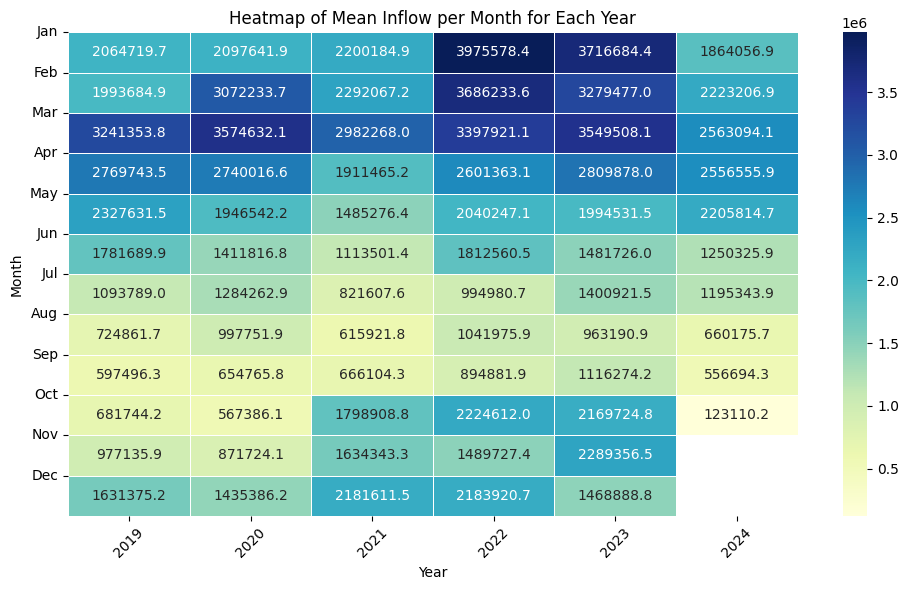

In [9]:
# Visualization: Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)

# Adding labels and title
plt.title('Heatmap of Mean Inflow per Month for Each Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(rotation=45)  # Rotate year labels for better visibility
plt.yticks(ticks=range(12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
], rotation=0)  # Setting month labels

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
df_pivot.head()

Year,2019,2020,2021,2022,2023,2024
Month,,,,,,
1,2.064720e+06,2.097642e+06,2.200185e+06,3.975578e+06,3.716684e+06,1.864057e+06
2,1.993685e+06,3.072234e+06,2.292067e+06,3.686234e+06,3.279477e+06,2.223207e+06
3,3.241354e+06,3.574632e+06,2.982268e+06,3.397921e+06,3.549508e+06,2.563094e+06
4,2.769743e+06,2.740017e+06,1.911465e+06,2.601363e+06,2.809878e+06,2.556556e+06
5,2.327631e+06,1.946542e+06,1.485276e+06,2.040247e+06,1.994532e+06,2.205815e+06


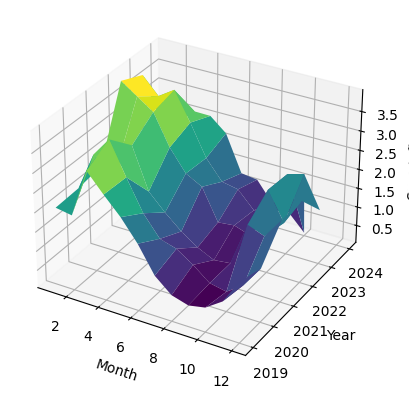

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for Month and Year (swap them)
X, Y = np.meshgrid(df_pivot.index, df_pivot.columns)

# Get the Z values (Sum Inflow) from the DataFrame
Z = df_pivot.values.T  # Transpose to match the new axes

# Create the figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot a surface or wireframe
ax.plot_surface(X, Y, Z, cmap='viridis')
#ax.view_init(azim=365, elev=-20)
# Set labels for axes (swap Month and Year)
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Sum Inflow')

# Show the plot
plt.show()


## Skewness
- explore whether the data is left or right skewed

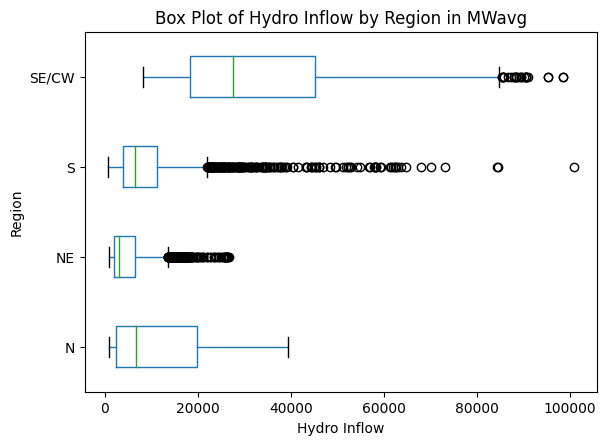

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a box plot grouped by 'Region'
df_hydro.boxplot(column='Inflow', by='Region', grid=False, vert = False)

# Add labels and title
plt.title('Box Plot of Hydro Inflow by Region in MWavg')
plt.suptitle('')  # Suppress default subtitle
plt.xlabel('Hydro Inflow')
plt.ylabel('Region')

# Display the plot
plt.show()


In [13]:
skewness = df_hydro['Inflow'].skew()
#show the Inflow of the skewness
print(f"Skewness of 'Inflow' column: {skewness}")
# Determine and print if the skewness is left or right
if skewness > 0:
    print("The data is right-skewed (positive skew).")
elif skewness < 0:
    print("The data is left-skewed (negative skew).")
else:
    print("The data is symmetric (no skew).")

Skewness of 'Inflow' column: 1.8785091021770914
The data is right-skewed (positive skew).


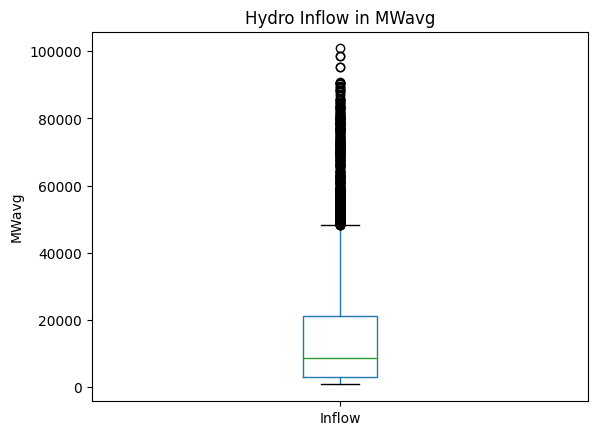

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a box plot grouped by 'Region'
df_hydro.boxplot(column='Inflow',  grid=False)

# Add labels and title
plt.title('Hydro Inflow in MWavg')
plt.suptitle('')  # Suppress default subtitle
plt.ylabel('MWavg')

# Display the plot
plt.show()


Skewness of Inflow Data: 1.88


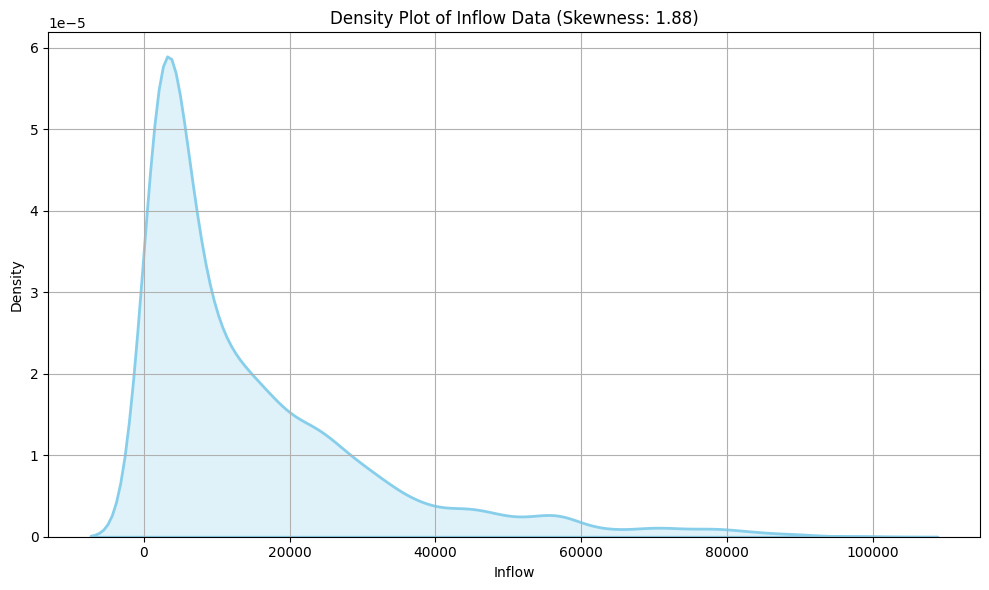

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Convert 'DateTime' to datetime format
df_hydro['DateTime'] = pd.to_datetime(df_hydro['DateTime'])

# Calculate skewness of the 'Inflow' column
inflow_skewness = skew(df_hydro['Inflow'])
print(f"Skewness of Inflow Data: {inflow_skewness:.2f}")

# Visualization: Density Plot (KDE) to show skewness
plt.figure(figsize=(10, 6))
sns.kdeplot(df_hydro['Inflow'], fill=True, color='skyblue', linewidth=2)

# Adding labels and title
plt.title(f'Density Plot of Inflow Data (Skewness: {inflow_skewness:.2f})')
plt.xlabel('Inflow')
plt.ylabel('Density')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


This means, we will need to use a function on our data. 
For right skewed data: 
- square root
- logarithm

This data will also require scaling